# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

Math behind this can be found here: https://www.notion.so/cweniger/The-math-of-contrastive-learning-6991de9a04c74d84be61239717fdb57c

## Purpose

- Prototype for systematically test and compare density estimation models

In [44]:
import numpy as np
import pylab as plt
import swyft
import torch

In [61]:
def model(z, sigma = 0.01):
    x = np.linspace(-5, 5, 30)
    X, Y = np.meshgrid(x,x)
    t1 = np.cos(X)*np.cos(Y)*z[0]
    t2 = np.cos(X)*np.sin(Y)*z[1]
    n = np.random.randn(*t1.shape)*sigma
    return (t1 + t2 + n)

x0 = model(np.array([0.2, .8, 0.5]), sigma = 0.01)

In [62]:
#plt.imshow(x0)

In [63]:
class Head(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, 3)
        self.conv2 = torch.nn.Conv2d(10, 20, 3)
        self.pool = torch.nn.MaxPool2d(2)
        
    def forward(self, x):
        x = x.unsqueeze(0).unsqueeze(0)
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        return x.flatten()

In [64]:
sw = swyft.SWYFT(model, 3, x0, device = 'cuda:0')

In [65]:
sw.round(n_sims = 1000, n_train = 3000, lr = 1e-4, head = Head().cuda())
sw.round(n_sims = 1000, n_train = 3000, lr = 1e-4, head = Head().cuda())

 29%|██▉       | 289/1000 [00:00<00:00, 2883.71it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)


  0%|          | 4/3000 [00:00<01:17, 38.57it/s]

Network optimization


100%|██████████| 3000/3000 [01:01<00:00, 48.89it/s]


Round:  1
Generate samples from constrained prior: z~pc(z)


 28%|██▊       | 277/1000 [00:00<00:00, 2766.30it/s]

Generate corresponding draws x ~ p(x|z)


  0%|          | 5/3000 [00:00<01:01, 48.31it/s]

Network optimization


100%|██████████| 3000/3000 [01:00<00:00, 49.19it/s]


In [66]:
post0 = sw.get_posteriors(nround=0)
post1 = sw.get_posteriors(nround=1)

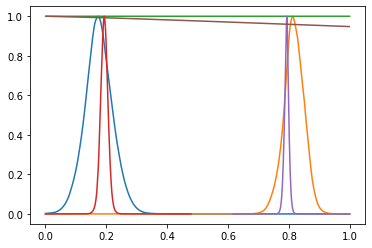

In [67]:
for i in range(3):
    plt.plot(post0[i]['z'], np.exp(post0[i]['lnL']))
for i in range(3):
    plt.plot(post1[i]['z'], np.exp(post1[i]['lnL']))
#plt.plot(post1[0]['z'], np.exp(post1[0]['lnL']))
#plt.plot(post2[0]['z'], np.exp(post2[0]['lnL']))
#plt.plot(post3[0]['z'], np.exp(post3[0]['lnL']))

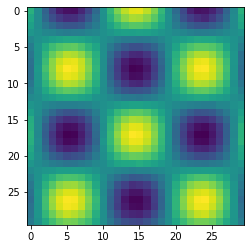

In [68]:
x = sw.xz_store[0][2]['x']
plt.imshow(x)